In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


STEP 1: Upload Dataset

STEP 2: Import Required Libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


STEP 3: Load the CSV Files

In [3]:
train_df = pd.read_csv("/content/Training.csv")
test_df  = pd.read_csv("/content/Testing.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (4920, 134)
Test shape: (42, 133)


STEP 4: REMOVE UNWANTED COLUMNS

Prevents ALL feature mismatch errors.

In [6]:
train_df = train_df.loc[:, ~train_df.columns.str.contains("^Unnamed")]
test_df  = test_df.loc[:, ~test_df.columns.str.contains("^Unnamed")]


STEP 5: Verify Columns

In [5]:
print("prognosis" in train_df.columns)
print("prognosis" in test_df.columns)


True
True


STEP 6: Separate Features & Target

In [8]:
X_train = train_df.drop("prognosis", axis=1)
y_train = train_df["prognosis"]

X_test  = test_df.drop("prognosis", axis=1)
y_test  = test_df["prognosis"]


STEP 7: Encode the Target

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)


STEP 8: Train the Model

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train_enc)


RandomForestClassifier(n_estimators=200, random_state=42)

STEP 9: Evaluate the Model

In [11]:
from sklearn.metrics import accuracy_score, classification_report

pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test_enc, pred))
print(classification_report(y_test_enc, pred))


Test Accuracy: 0.9761904761904762
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00    

confusion matrix

<Figure size 1000x1000 with 0 Axes>

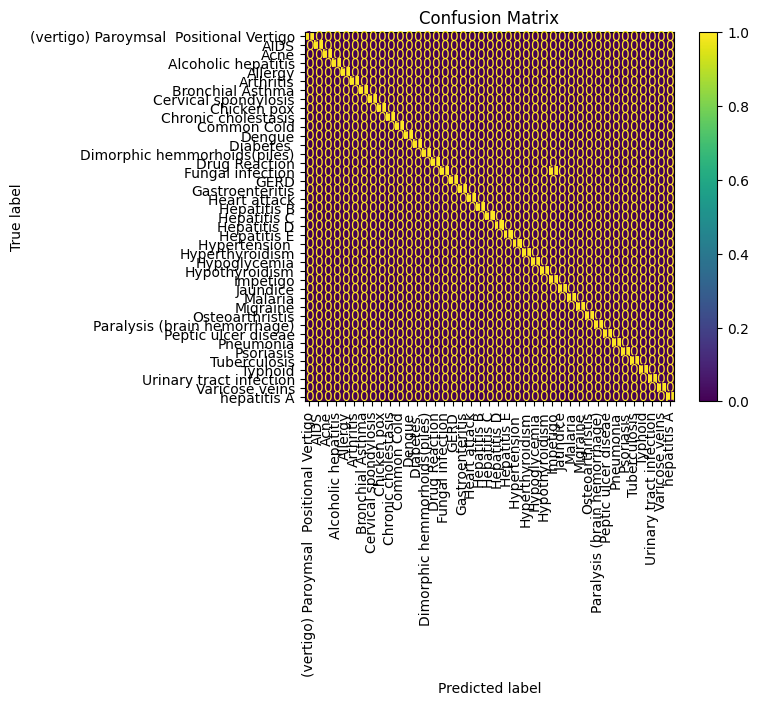

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix again
cm = confusion_matrix(y_test_enc, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

plt.figure(figsize=(10, 10))
disp.plot(xticks_rotation=90)
plt.title("Confusion Matrix")

# SAVE BEFORE SHOW
plt.savefig("confusion_matrix.png", bbox_inches="tight")
plt.show()
